<a href="https://colab.research.google.com/github/Ashish-mishra66/colab-notebooks/blob/main/UBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0  

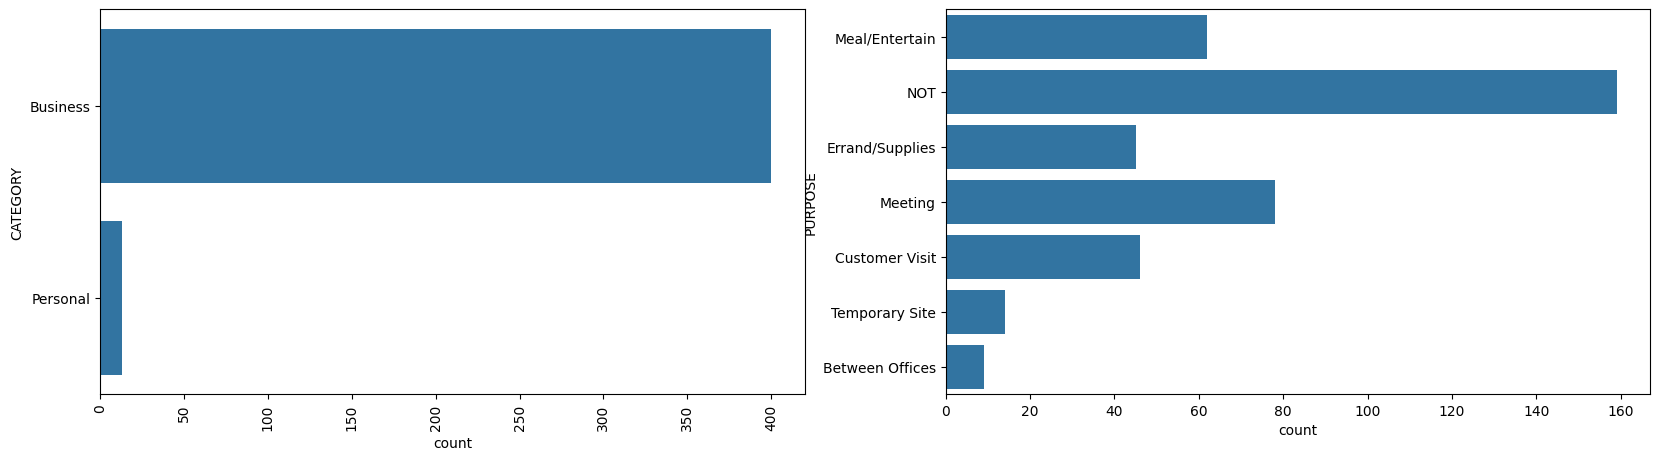

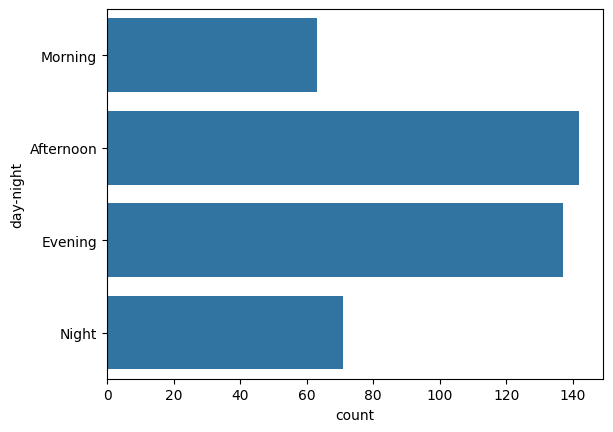

<Axes: xlabel='DAY', ylabel='COUNT'>

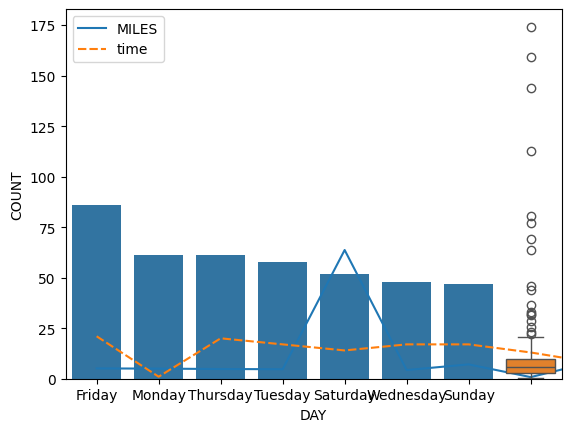

In [16]:
 # in which category do people book the most uber auto
 # For which purpose do people book ubder rides the most
 # At what time do people book cabs the most from uber
 # in which months do people book uber rides less frequently
 # On which days of the week do people book uber ride most
 # how many miles do people usually book a cab for through uber
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 df = pd.read_csv('/content/UberDataset.csv')
 print(df)
 print(df.shape)
 print(df.info)
 # Data preprocessing
df['PURPOSE'] = df['PURPOSE'].fillna("NOT")
df['START_DATE']= pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'], errors= 'coerce')
df.info()
print(df)
from datetime import datetime
df['date']= pd.DatetimeIndex(df['START_DATE']).date
print(df)
df['time']= pd.DatetimeIndex(df['START_DATE']).hour
print(df)
df['day-night'] = pd.cut(x=df['time'],bins= [0,10,15,19,24],labels =['Morning', 'Afternoon','Evening', 'Night'])
print(df)

df.dropna(inplace=True)
print(df.shape)
# Data visualization
# in which category do people book the most uber auto
# For which purpose do people book ubder rides the most
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.show()
# At what time do people book cabs the most from uber

sns.countplot(df['day-night'])
plt.show()
# in which months do people book uber rides less frequently
df.head()
df['month']= pd.DatetimeIndex(df['START_DATE']).month
month_lable= {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month']= df.month.map(month_lable)
mon = df.month.value_counts(sort=False)
df.head()
finla_df =pd.DataFrame({
    "month":mon.values, # har month ko total count
    "VALUE COUNT": df.groupby('month',sort=False)['MILES'].max()

})
p= sns.lineplot(data= df)
p.set(xlabel='month',ylabel= 'VALUE COUNT')
df.head()
df['DAY']= df.START_DATE.dt.weekday
data_label = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['DAY']= df.DAY.map(data_label)
df.head()
# which day uber rides book more
data_label= df.DAY.value_counts()
sns.barplot(x= data_label.index, y= data_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
df.head()
# miles
sns.boxplot(df['MILES'])




